In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df1=df.copy()

In [3]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [4]:
df1.shape

(10683, 11)

In [5]:
# Description of numerical column

df1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# Description of categorical column

df1.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [7]:
# Finding the missing values

null_data=df1.isna().sum().sort_values(ascending=False).head(5)
pd.DataFrame({'No_of_NaN':null_data,'perc_of_NaN':(null_data/len(df1))*100})

,No_of_NaN,perc_of_NaN
Route,1,0.009361
Total_Stops,1,0.009361
Airline,0,0.000000
Date_of_Journey,0,0.000000
Source,0,0.000000


In [326]:
# 'Route' and 'Total_Stops' columns have only one null values. It can be dropped


In [3]:
# Saving all categorical column names in a list for easy analysis

cat_col=df1.select_dtypes(include='object')

In [9]:
# Let us see all the unique values of all categorical columns

for col in cat_col:
    print("Unique value counts of column '{}':".format(col))
    print(df1[col].unique())
    print('='*75)

Unique value counts of column 'Airline':
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Unique value counts of column 'Date_of_Journey':
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Unique value counts of column 'Source':
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Unique value counts of column 'Destination':
['New Delhi' 'Ba

In [10]:
# Finding the top 20 values counts of all categorical columns

for col in cat_col:
    print("Values and its counts of column '{}':".format(col))
    print (df1[col].value_counts(dropna=False).sort_values(ascending=False).head(20))
    print('='*50)

Values and its counts of column 'Airline':
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Values and its counts of column 'Date_of_Journey':
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
Name: Date_of_

In [ ]:
# Based on the observation:
# Values in Airline column can be clubbed together
# Destination column has duplicate values of New Delhi and Delhi. Need to be rectified.
# Day,month and weekday can be extracted from Date_of_Journey column. Year is not needed as it has only 2019.
# Time can be converted to numerical from Dep_Time,Arrival_Time columns
# Duration can be converted too
# 'Additional_Info' column has majority value of Null.It can be dropped

In [ ]:
# Checking for duplicates

In [11]:
df1[df1.duplicated(keep='first')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,Null,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,Null,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,Null,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,Null,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,Null,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,Null,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [11]:
# Above data have similar Airline,Route,Source,Destination data but on different date,prices. Hence need not be removed

In [ ]:
# EDA

In [4]:
def eda(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True,inplace=True)
    data['Airline']=np.where(data['Airline']=='Jet Airways Business','Jet Airways',data['Airline'])
    data['Airline']=np.where(data['Airline']=='Vistara Premium economy','Vistara',data['Airline'])
    data['Airline']=np.where(data['Airline']=='Multiple carriers Premium economy','Multiple carriers',data['Airline'])
    data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
    data['Day']=pd.DatetimeIndex(data['Date_of_Journey']).day
    data['Month']=pd.DatetimeIndex(data['Date_of_Journey']).month
    data['Weekday']=pd.DatetimeIndex(data['Date_of_Journey']).weekday
    data['Destination']=np.where(data['Destination']=='New Delhi','Delhi',data['Destination'])
    data['Dep_Time_hr']=data['Dep_Time'].str[0:2].astype(int)
    data['Dep_Time_min']=data['Dep_Time'].str[2:4].str.replace(':','').astype(int)
    data['Arrival']=data['Arrival_Time'].str[0:5]
    data['Arrival_hr']=data['Arrival'].str[0:2].astype(int)
    data['Arrival_min']=data['Arrival'].str[2:4].str.replace(':','').astype(int)
    data['Tot_duration']=np.round(df1['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval),2)
    data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
    data1=pd.get_dummies(data, prefix=['Airline','Source','Destination'],columns = ['Airline','Source','Destination'], drop_first = True)
    data1.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Route','Arrival','Additional_Info','Duration'], axis =1, inplace = True)
    
    return data,data1

In [5]:
data_eda,data_model=eda(df1)

In [6]:
pd.set_option('display.max_columns',None)
print(data_model.shape)
data_model.head()

(10462, 26)


,Total_Stops,Price,Day,Month,Weekday,Dep_Time_hr,Dep_Time_min,Arrival_hr,Arrival_min,Tot_duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,6,22,2,1,1,2.83,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,5,5,13,1,7.42,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,6,9,4,9,2,4,2,19.00,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,5,12,3,18,0,23,3,5.42,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,3,1,3,16,5,21,3,4.75,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                10462 non-null  int64  
 1   Price                      10462 non-null  int64  
 2   Day                        10462 non-null  int64  
 3   Month                      10462 non-null  int64  
 4   Weekday                    10462 non-null  int64  
 5   Dep_Time_hr                10462 non-null  int32  
 6   Dep_Time_min               10462 non-null  int32  
 7   Arrival_hr                 10462 non-null  int32  
 8   Arrival_min                10462 non-null  int32  
 9   Tot_duration               10462 non-null  float64
 10  Airline_Air India          10462 non-null  uint8  
 11  Airline_GoAir              10462 non-null  uint8  
 12  Airline_IndiGo             10462 non-null  uint8  
 13  Airline_Jet Airways        10462 non-null  uin

In [16]:
data_eda.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Weekday,Dep_Time_hr,Dep_Time_min,Arrival,Arrival_hr,Arrival_min,Tot_duration
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,3897,24,3,6,22,2,01:10,1,1,2.83
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,5,1,5,5,5,13:15,13,1,7.42
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,Null,13882,6,9,4,9,2,04:25,4,2,19.00


In [175]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  int64         
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
 11  Day              10462 non-null  int64         
 12  Month            10462 non-null  int64         
 13  Weekday          10462 non-null  int64         
 14  Dep_Time_hr      10462 non-null  int32

<Axes: >

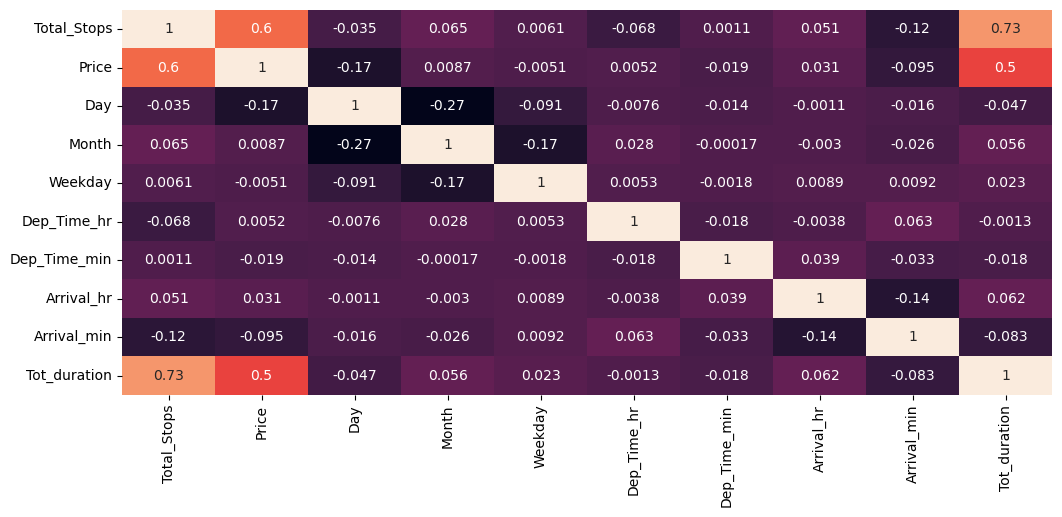

In [17]:
# Heatmap to see the correlation of the data_eda df

plt.figure(figsize=(12,5))
sns.heatmap(data_eda.corr(),annot=True,cbar=False)

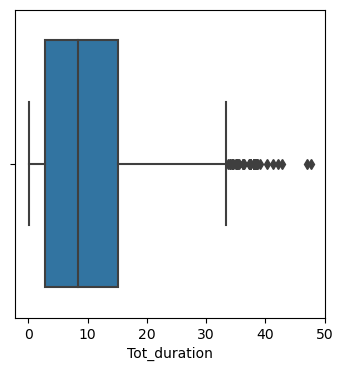

In [18]:
# Total_Stops and Tot_duration have correlation of 0.73. One column can be removed

# Total_Stops is a categorical column and Tot_duration is a numerical column. So if Tot_duration has outliers,it can be removed

plt.figure(figsize=(4,4))
sns.boxplot(x='Tot_duration',data=data_eda)
plt.show()

In [6]:
# Outilers are present in Tot_duration. Removing the Tot_duration variable from both eda and model data

data_eda.drop('Tot_duration',axis=1,inplace=True)
data_model.drop('Tot_duration',axis=1,inplace=True)

In [8]:
# Total_Stops,Day,Month,weekday are ordinal categorical data. For Eda analysis 
# Converting those to objects for easy analysing and better visual presentaion in data_eda df

data_eda['Total_Stops']=data_eda['Total_Stops'].map({0:'0 stop',1:'1 stop',2:'2 stops',3:'3 stops',4:'4 stops'})
data_eda['Day']=data_eda['Day'].astype(object)
data_eda['Month']=data_eda['Month'].map({1:"January",3:'March',4:'April',5:'May',6:'June',9:'September',12:'December'})
data_eda['Weekday']=data_eda['Weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [21]:
data_eda.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Weekday,Dep_Time_hr,Dep_Time_min,Arrival,Arrival_hr,Arrival_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,Null,3897,24,March,Sunday,22,2,01:10,1,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,5,January,Saturday,5,5,13:15,13,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,6,September,Friday,9,2,04:25,4,2


In [22]:
data_eda.select_dtypes('object').columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Day', 'Month', 'Weekday',
       'Arrival'],
      dtype='object')

In [23]:
# Univariate Analysis of categorical column

# Function to visualize the categorical column

def visual_cat(l):
    fig,axes = plt.subplots(nrows=1, ncols=len(l), figsize=(15, 5))

    for i,col in enumerate(l):
        sns.countplot(x=col,data=data_eda, ax=axes[i],order=data_eda[col].value_counts().index)
        axes[i].set_title(f'Countplot of {col}')
        axes[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()


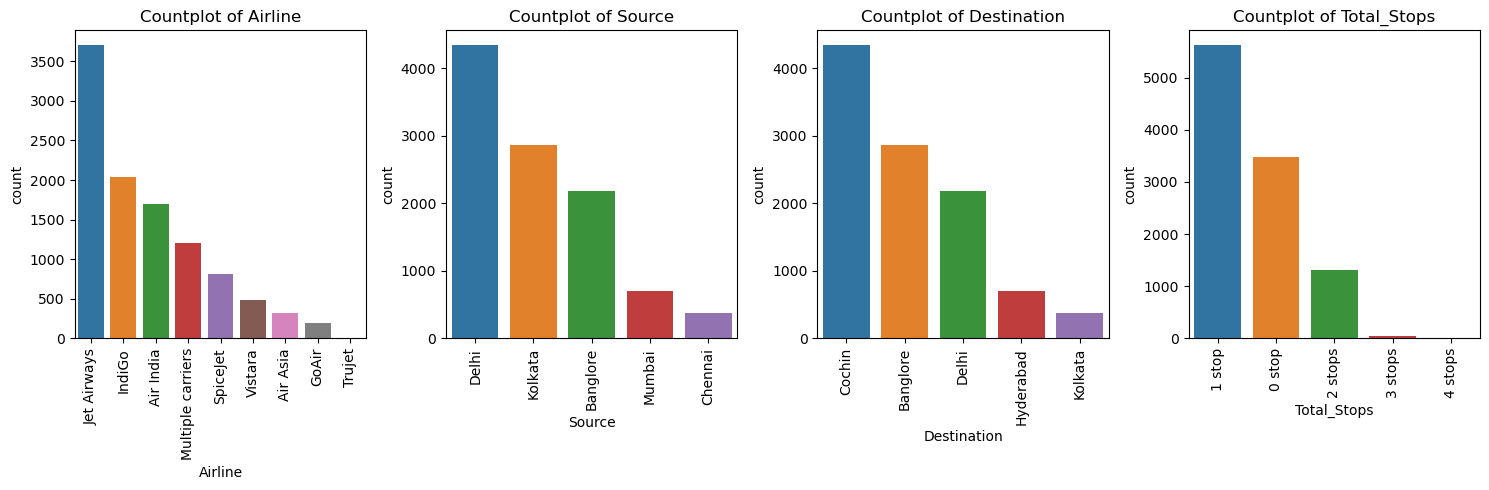

In [24]:
# Distribution of 'Airline','Source','Destination' values

l=['Airline', 'Source', 'Destination','Total_Stops']
visual_cat(l)

In [ ]:
# Jet Airways and Trujet have the maximum and minimum counts in the Airline variable
# Delhi and Chennai have the maximum and minimum counts in the Source variable
# Cochin and Kolkata  have the maximum and minimum counts in the Destination variable
# 1 stop and 4 stops flight journeys are more and less 

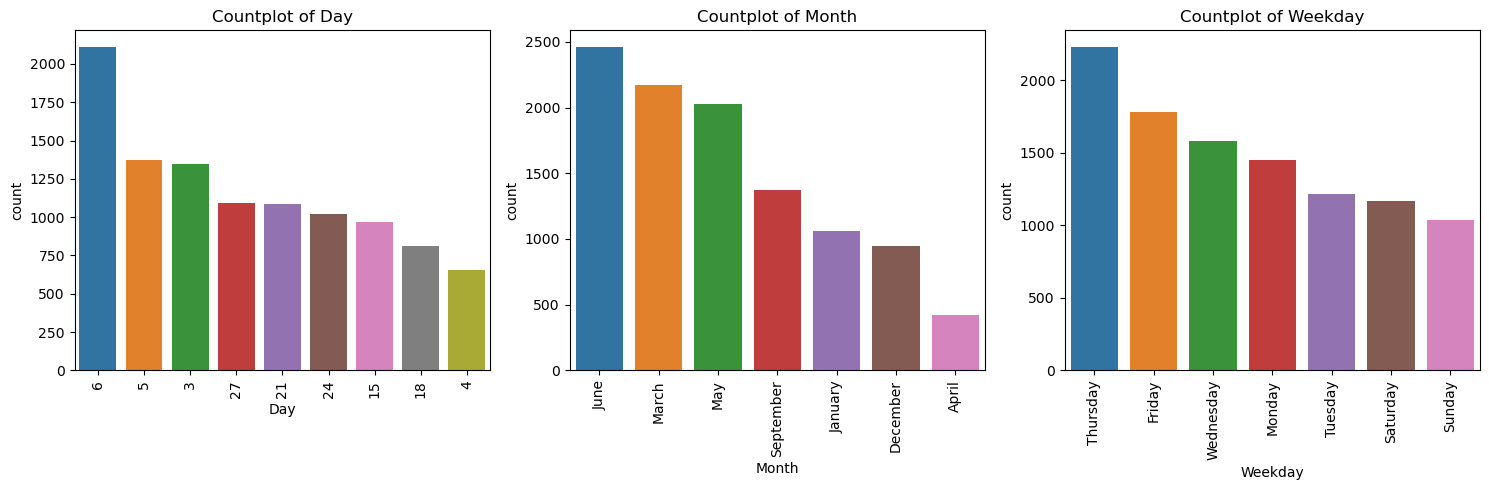

In [25]:
# Distribution of Day,Month,Weekday columns

l=['Day','Month','Weekday']
visual_cat(l)

In [ ]:
# Number of flight journey is high and less on day 6th and 4th of the month
# Number of flight journeys are high and less on June and April months
# Number of flight journeys are high and less on Thursday and Sunday of the week


In [26]:
# Univariate analysis of numerical columns

data_eda.select_dtypes(exclude='object').columns

Index(['Date_of_Journey', 'Price', 'Dep_Time_hr', 'Dep_Time_min', 'Arrival_hr',
       'Arrival_min'],
      dtype='object')

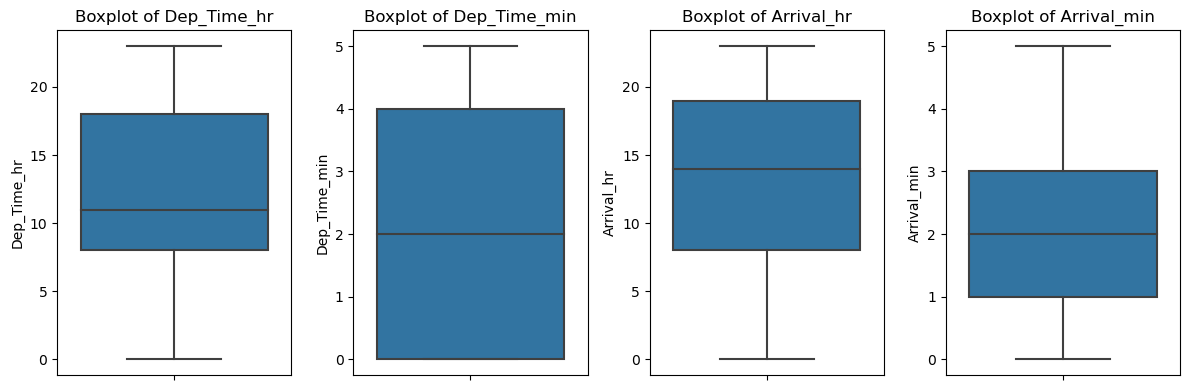

In [28]:
# Boxplot of the variables

l=['Dep_Time_hr','Dep_Time_min','Arrival_hr','Arrival_min']
fig,axes = plt.subplots(nrows=1, ncols=len(l), figsize=(12,4))
for j,col in enumerate(l):
    sns.boxplot(y=col,data=data_eda, ax=axes[j])
    axes[j].set_title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


In [201]:
# No outliers in the numerical column

In [30]:
# Bivariate Analysis

# Function to visualize the bivariate analysis

def visual_bivar(l):
    fig,axes = plt.subplots(nrows=1, ncols=len(l), figsize=(15,5))

    for i,col in enumerate(l):
        sns.barplot(x=col,y='Price',data=data_eda,ax=axes[i],ci=None,
                   order=data_eda.groupby([col])['Price'].mean().sort_values(ascending=False).index)
        axes[i].set_title(f'{col} v/s Price')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


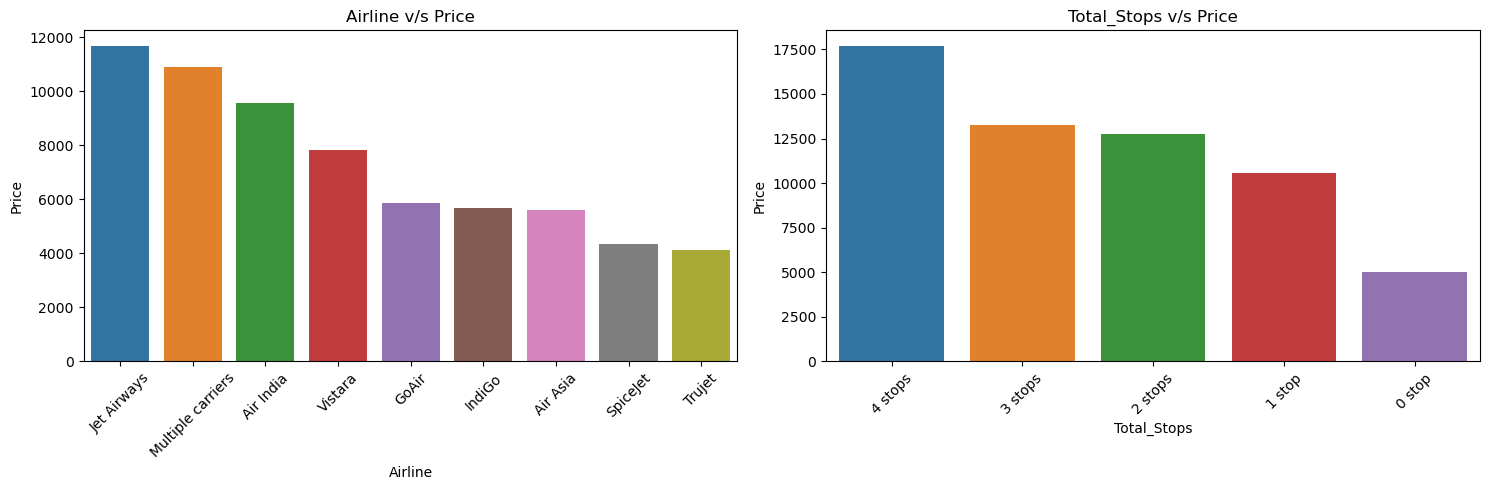

In [31]:
# Analysis of 'Airline' and 'Total_Stops' column with target 'Price' variable

l=['Airline','Total_Stops']
visual_bivar(l)

In [ ]:
# Jet Airways,Multiple,Air India carriers have the top 3 prices
# Price in the 4 stops and 0 stop flight journeys are more and less

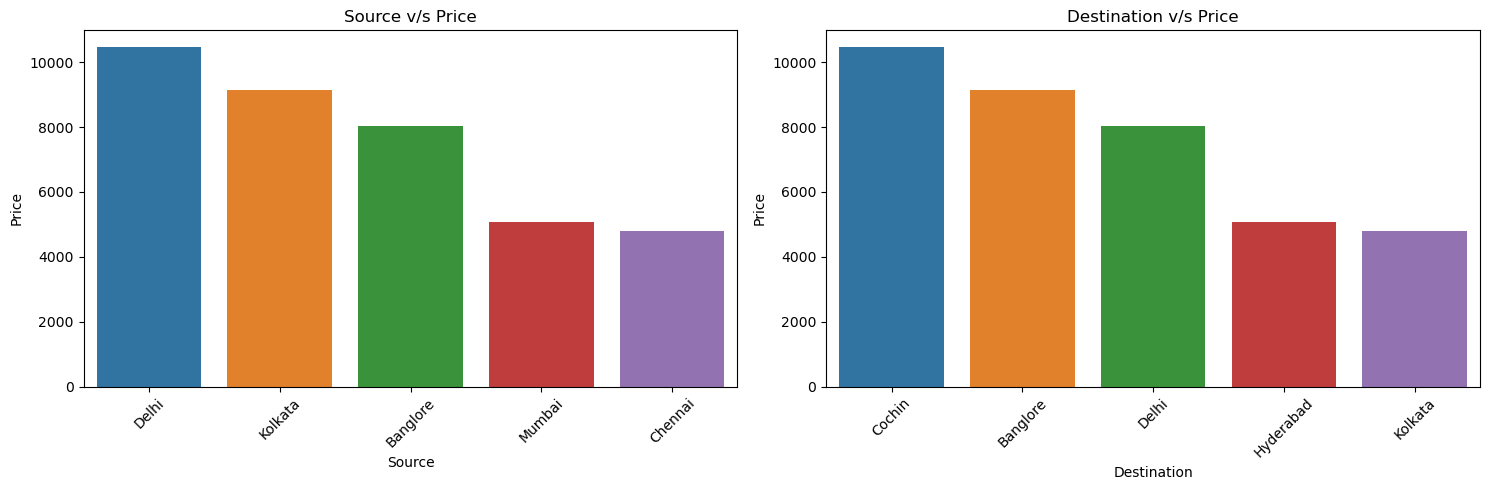

In [32]:
# Distribution of Sourec and Destination columns with target price variable

l=['Source','Destination']
visual_bivar(l)

In [ ]:
# Delhi and Chennai comes under top and least source in terms of price
# Cochin and Kolkata comes under top and least destination in terms of price


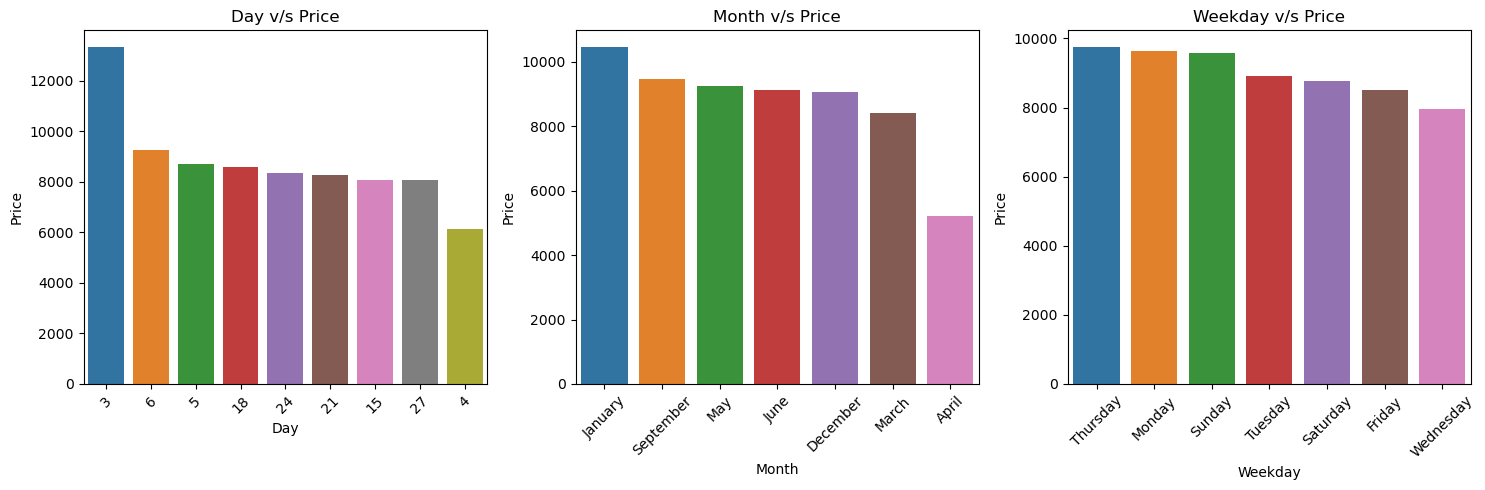

In [33]:
# Distribution of Day,Month,Weekday columns with target price variable

l=['Day','Month','Weekday']
visual_bivar(l)

In [108]:
# Price during the January and April months are high and low
# Price on Thursday and Wednesday are high and low

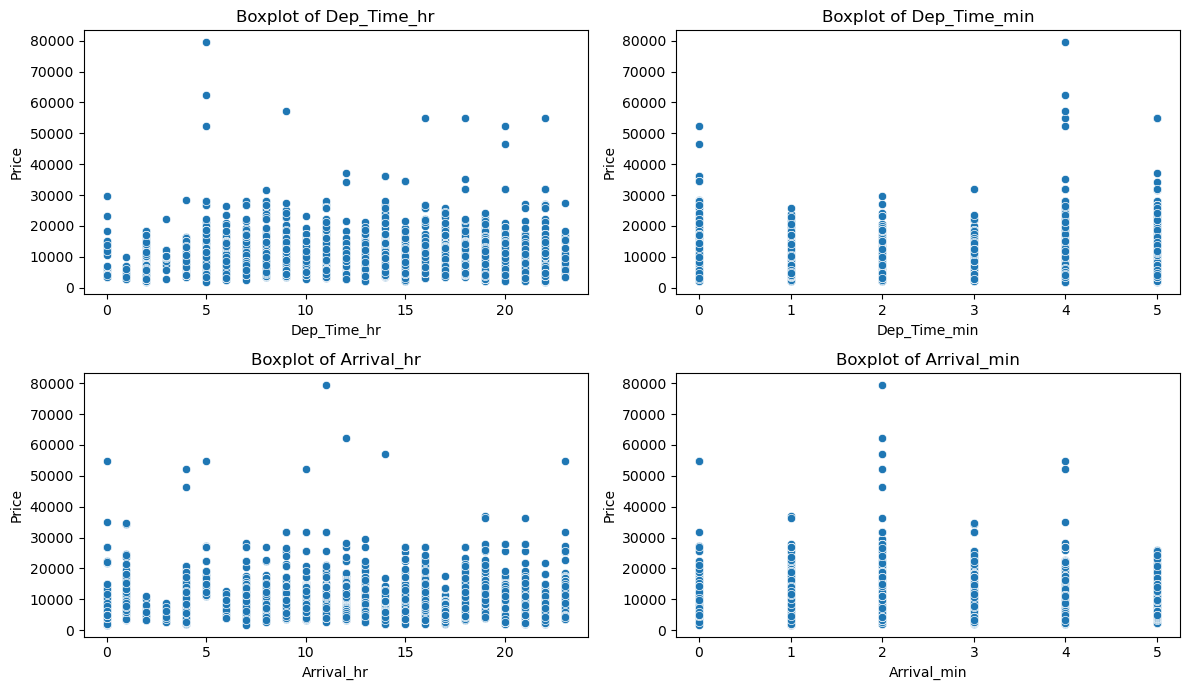

In [34]:
# Bivariate analysis of 'Dep_Time_hr','Dep_Time_min','Arrival_hr','Arrival_min','Tot_duration' with targt'Price' 

l1=['Dep_Time_hr','Dep_Time_min']
l2=['Arrival_hr','Arrival_min']
fig,axes = plt.subplots(nrows=2, ncols=len(l1), figsize=(12,7))
for i in range(2):
    for j,col in enumerate(l1):
        sns.scatterplot(x=col,y='Price',data=data_eda, ax=axes[i,j])
        axes[i,j].set_title(f'Boxplot of {col}')
        l1=l2
plt.tight_layout()
plt.show()


In [35]:
data_eda.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Weekday,Dep_Time_hr,Dep_Time_min,Arrival,Arrival_hr,Arrival_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,Null,3897,24,March,Sunday,22,2,01:10,1,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,5,January,Saturday,5,5,13:15,13,1


In [36]:
# Function to visualize the Multivatriate analysis of variables

def multi_var(x_col,y_col,hue_col):
    plt.figure(figsize=(12,5))
    sns.barplot(x=x_col,y=y_col,data=data_eda,hue=hue_col,ci=None,hue_order=data_eda[hue_col].unique())
    plt.legend(loc=1)
    plt.show()

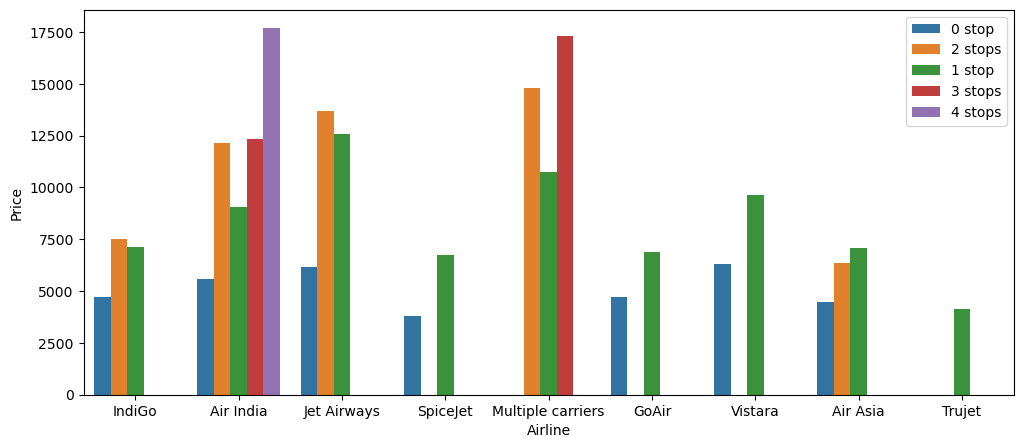

In [37]:
# Analysis between Airline,Price & Total_Stops

multi_var('Airline','Price','Total_Stops')

In [ ]:
# Only AirIndia airline has flight journey with all 4 stops.It is the only airline to have 4 stops journey.
# Spicejet,GoAir,Vistara have 0 & 1 stops
# Indigo,Jet Airways, Air Asia have 0,1 & 2 stops
# Spicejet is economical in fight journey with 0 stop
# Trujet is economical in fight journey with 1 stop
# Air Asia is economical in fight journey with 2 stops
# Air India is economical in fight journey with 3 stops


In [38]:
# Analysis between Source,Price,Destination

data_eda[['Source','Destination','Price']].groupby(['Source','Destination'])['Price'].mean()

Source    Destination
Banglore  Delhi           8022.872877
Chennai   Kolkata         4789.892388
Delhi     Cochin         10461.600690
Kolkata   Banglore        9143.083566
Mumbai    Hyderabad       5059.708752
Name: Price, dtype: float64

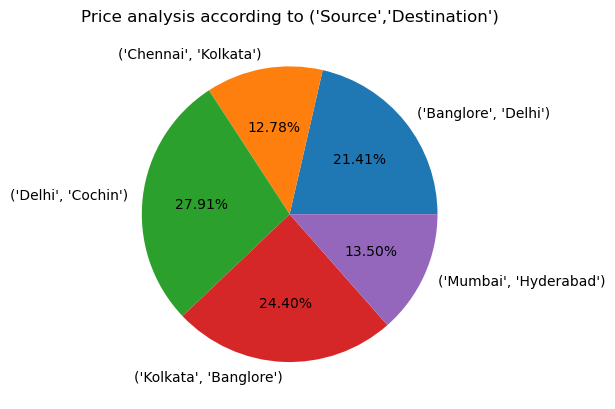

In [39]:
# Visualizing above data

temp=data_eda[['Source','Destination','Price']].groupby(['Source','Destination'])['Price'].mean()
l=temp.index.values.tolist()
#sns.barplot(x=l,y=temp.values,data=temp
plt.pie(temp.values,labels=l,autopct='%.2f%%')
plt.title("Price analysis according to ('Source','Destination')")
plt.show()

In [ ]:
# Flight journey between Chennai and Kolkata is cheaper
# Flight journey between Delhi and Cochin is costlier

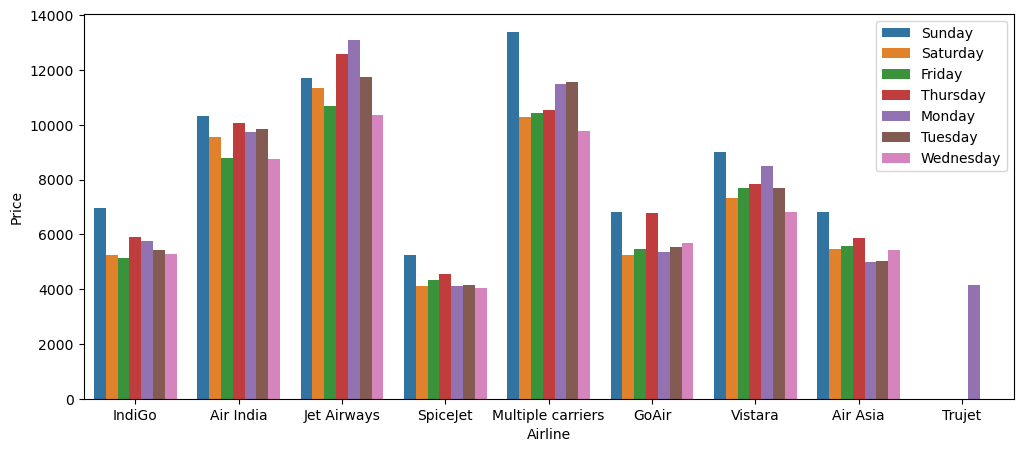

In [40]:
# Analysing 'Airline','Price','Weekday' columns

multi_var('Airline','Price','Weekday')

In [ ]:
# Trujet has its service only on Monday of the week
# Except Jet Airways, all other airlines offer flight service with high price on Sunday.
# While Jet Airways Monday service is costlier

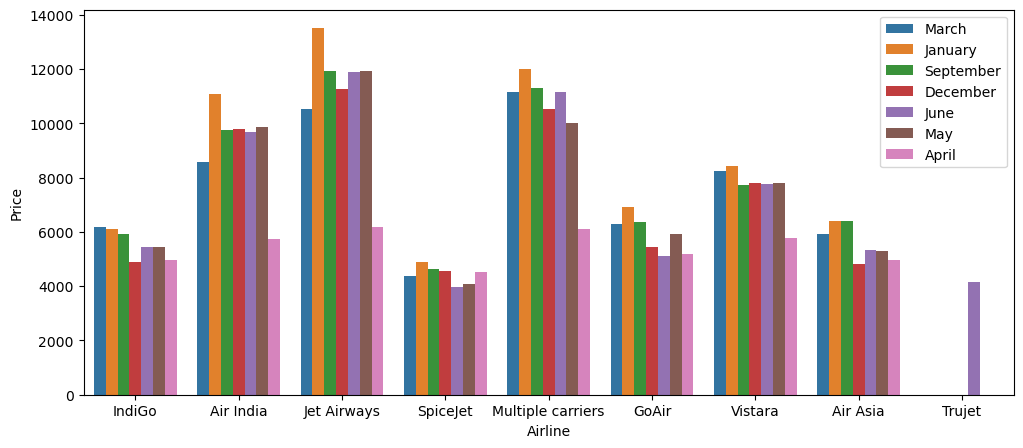

In [41]:
# Analysing 'Airline','Price','Weekday' columns

multi_var('Airline','Price','Month')

In [ ]:
# Trujet has its service only during the december month
# All other airlines offer their service with high price during January month and with low price during April month

In [42]:
data_eda['Airline'].unique()[:5]

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers'], dtype=object)

<Figure size 1200x700 with 0 Axes>

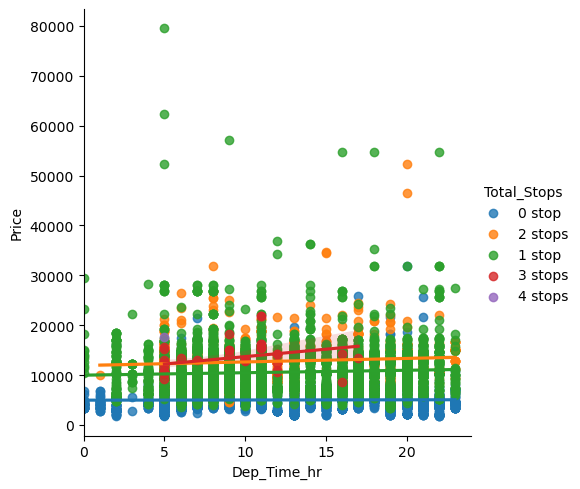

In [43]:
# Analysing 'Tot_duration','Price' and 'Total_Stops' variables

plt.figure(figsize=(12,7))
sns.lmplot(x='Dep_Time_hr',y='Price',data=data_eda,hue='Total_Stops')
plt.xlim(0,24)
plt.show()

In [44]:
data_model.head(2)

,Total_Stops,Price,Day,Month,Weekday,Dep_Time_hr,Dep_Time_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,6,22,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,5,5,13,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [7]:
# Standardizing the data 

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data=ss.fit_transform(data_model.drop('Price',axis=1))

In [8]:
data=pd.DataFrame(data,columns=data_model.drop('Price',axis=1).columns)


In [9]:
# Finding the feature importance

from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(data,data_model['Price'])
fea_imp=etr.feature_importances_

In [10]:
# Evaluating top 15 features based on their importance

fi_data=pd.DataFrame(fea_imp,data_model.drop('Price',axis=1).columns,columns=['Feature_importance']).reset_index()
fi_data=fi_data.sort_values(by='Feature_importance',ascending=False)
print('Contribution percentage of top 15 features(half of total) based on their importance:',
     fi_data['Feature_importance'][:15].sum()*100,'\n')
top_features=fi_data['index'].head(15).values
print('Top 12 features are:''\n',top_features)
fi_data

Contribution percentage of top 15 features(half of total) based on their importance: 97.01670504387523 

Top 12 features are:
 ['Total_Stops' 'Airline_Jet Airways' 'Day' 'Month' 'Dep_Time_hr'
 'Arrival_hr' 'Weekday' 'Airline_Multiple carriers' 'Dep_Time_min'
 'Arrival_min' 'Airline_Air India' 'Destination_Delhi' 'Airline_IndiGo'
 'Destination_Hyderabad' 'Source_Mumbai']


,index,Feature_importance
0,Total_Stops,0.303583
11,Airline_Jet Airways,0.158428
1,Day,0.103062
2,Month,0.077107
4,Dep_Time_hr,0.051525
6,Arrival_hr,0.051521
3,Weekday,0.044113
12,Airline_Multiple carriers,0.041038
5,Dep_Time_min,0.035055
7,Arrival_min,0.026563


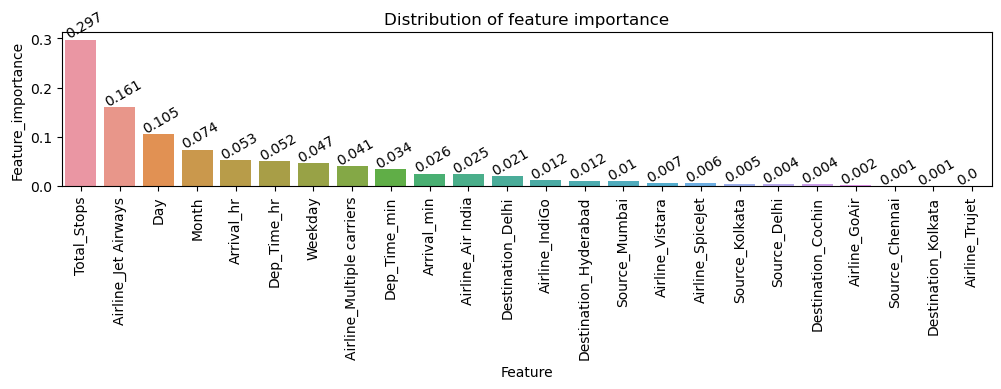

In [95]:
# Visualizing the above data
plt.figure(figsize=(12,2))
ax=sns.barplot(x='index',y='Feature_importance',data=fi_data,order=fi_data['index'])
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),3),(p.get_x()-0.05,p.get_height()+0.0025),rotation=30)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.title('Distribution of feature importance')
plt.show()

In [134]:
# Top features can be considered as it gives almost 98% of contributions from the whole data and
# If number of features of modelling is too high and as per the business request

#x=data[top_features]
#y=data_model['Price']

In [135]:
#x.shape,y.shape

((10462, 15), (10462,))

In [14]:
x=data
y=data_model['Price']

In [15]:
# Splitting training & testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
# Function for evaluation metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Evalued values
def eva_metrics(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    rmse=np.sqrt(mse)
    r2=r2_score(actual,pred)
    num=X_test.shape[0]-1 #(n-1)
    den=X_test.shape[0]-X_test.shape[1]-1 #(n-k-1)
    adj_r2=1-(1-r2)*num/den    
    return mae,mse,rmse,r2,adj_r2
    

In [17]:
# Function to check training and testing score

def train_test_score(X_train,X_test,y_train,y_test,model):
    train_sco=model.score(X_train,y_train)
    test_sco=model.score(X_test,y_test)
    return train_sco,test_sco

In [18]:
# Function to visualize actual and predicated price values

def act_pred(actual,pred,model):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=actual,y=pred)
    plt.title(f'Scatter plot of actual and predicted price values of {model} model')
    plt.show()

In [19]:
# Linear regression model

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
# Prediction by sklearn linear regression model
lrpred=lr.predict(X_test)

In [21]:
# Checking training & testing score

lr_train_score,lr_test_score=train_test_score(X_train,X_test,y_train,y_test,lr)
print('Training score:',lr_train_score)
print('Testing score:',lr_test_score)

Training score: 0.5441329276262442
Testing score: 0.5470960157558837


In [22]:
# Calling evaluation function

lr_mae,lr_mse,lr_rmse,lr_r2,lr_adj_r2=eva_metrics(y_test,lrpred)
print('Mean_absolute_error:',lr_mae)
print('Mean_squared_error:',lr_mse)
print('Root_mean_squared_error:',lr_rmse)
print('R2 score:',lr_r2)
print('Adjusted r2 value:',lr_adj_r2)


Mean_absolute_error: 2116.2970044685694
Mean_squared_error: 9443173.244145485
Root_mean_squared_error: 3072.974657257278
R2 score: 0.5470960157558837
Adjusted r2 value: 0.541839876673747


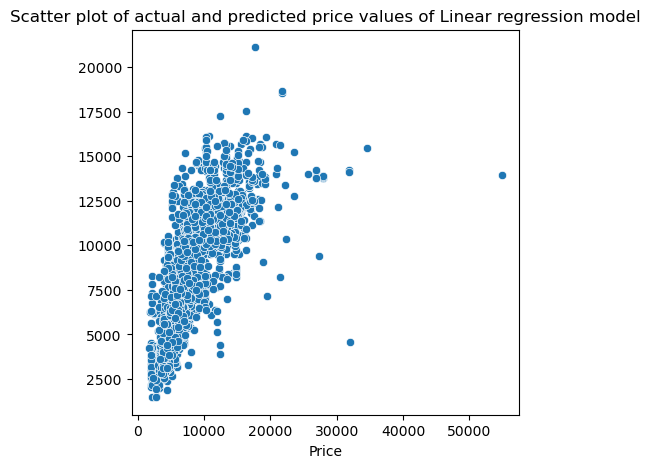

In [23]:
# Visualizing the actual price and predicted price variations by scatterplot

act_pred(y_test,lrpred,'Linear regression')

In [24]:
# Random forest regression

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [25]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
# Prediction by Random forest regressor

rf_pred=rf.predict(X_test)


In [27]:
# Checking training & testing score

rf_train_score,rf_test_score=train_test_score(X_train,X_test,y_train,y_test,rf)
print('Training score:',rf_train_score)
print('Testing score:',rf_test_score)

Training score: 0.9509246308751393
Testing score: 0.8107892758569629


In [28]:
# Calling evaluation function

rf_mae,rf_mse,rf_rmse,rf_r2,rf_adj_r2=eva_metrics(y_test,rf_pred)
print('Mean_absolute_error:',rf_mae)
print('Mean_squared_error:',rf_mse)
print('Root_mean_squared_error:',rf_rmse)
print('R2 score:',rf_r2)
print('Adjusted r2 value:',rf_adj_r2)


Mean_absolute_error: 1178.1750724777294
Mean_squared_error: 3945095.892046421
Root_mean_squared_error: 1986.2265460028523
R2 score: 0.8107892758569629
Adjusted r2 value: 0.8085934067179722


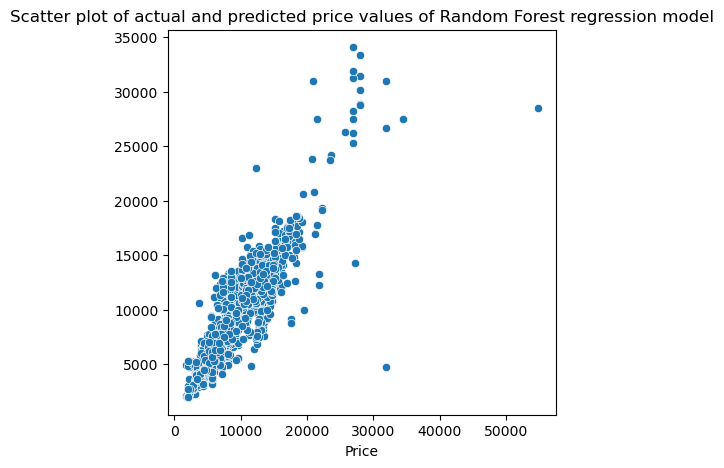

In [29]:
# Visualizing the actal and predicted price values

act_pred(y_test,rf_pred,'Random Forest regression')

In [30]:
# KNN regression model

# Finding the optimal k neighbor
from sklearn.neighbors import KNeighborsRegressor
error = []

# Calculating error for K values between 1 and 20
for i in range(1,20):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

In [31]:
print(error)

[0.7720974677496416, 0.9001433349259437, 0.9440993788819876, 0.9727663640707119, 0.9842331581462016, 0.9913999044433827, 0.9928332537028189, 0.9933110367892977, 0.9942666029622551, 0.9966555183946488, 0.9976110845676063, 0.998088867654085, 0.9985666507405638, 0.9985666507405638, 0.9995222169135213, 1.0, 1.0, 1.0, 1.0]


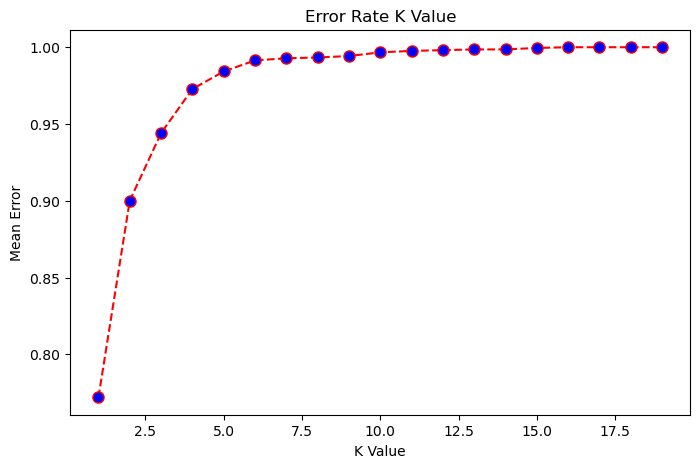

In [32]:
plt.figure(figsize=(8,5))  
plt.plot(range(1,20),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=8)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [33]:
# Based on the graph, we are choosing the k neighbor value as 10 for modelling the data

knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [36]:
knn_pred=knn.predict(X_test)

In [34]:
# Checking training & testing score

knn_train_score,knn_test_score=train_test_score(X_train,X_test,y_train,y_test,knn)
print('Training score:',knn_train_score)
print('Testig score:',knn_test_score)

Training score: 0.7557417063504007
Testig score: 0.7083443730842217


In [37]:
# Calling evaluation function

knn_mae,knn_mse,knn_rmse,knn_r2,knn_adj_r2=eva_metrics(y_test,knn_pred)
print('Mean_absolute_error:',knn_mae)
print('Mean_squared_error:',knn_mse)
print('Root_mean_squared_error:',knn_rmse)
print('R2 score:',knn_r2)
print('Adjusted r2 value:',knn_adj_r2)


Mean_absolute_error: 1592.323602484472
Mean_squared_error: 6081100.428365982
Root_mean_squared_error: 2465.988732408561
R2 score: 0.7083443730842217
Adjusted r2 value: 0.7049595882457407


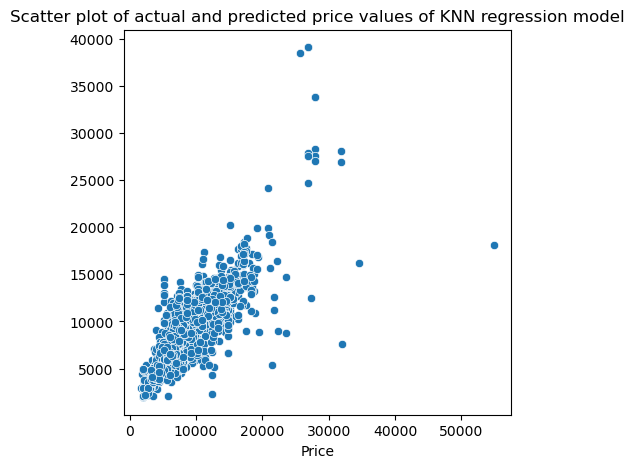

In [38]:
# Visualizing the actal and predicted price values

act_pred(y_test,knn_pred,'KNN regression')

In [39]:
# XGBoost regression model

from xgboost import XGBRegressor

xgb=XGBRegressor()

In [40]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
xgb_pred=xgb.predict(X_test)

In [42]:
# Checking training & testing score

xgb_train_score,xgb_test_score=train_test_score(X_train,X_test,y_train,y_test,xgb)
print('Training score:',xgb_train_score)
print('Testig score:',xgb_test_score)

Training score: 0.9353116245877906
Testig score: 0.8245403948653676


In [43]:
# Calling evaluation function

xgb_mae,xgb_mse,xgb_rmse,xgb_r2,xgb_adj_r2=eva_metrics(y_test,xgb_pred)
print('Mean_absolute_error:',xgb_mae)
print('Mean_squared_error:',xgb_mse)
print('Root_mean_squared_error:',xgb_rmse)
print('R2 score:',xgb_r2)
print('Adjusted r2 value:',xgb_adj_r2)


Mean_absolute_error: 1183.0146556695681
Mean_squared_error: 3658381.260215679
Root_mean_squared_error: 1912.6895357625815
R2 score: 0.8245403948653676
Adjusted r2 value: 0.8225041131810198


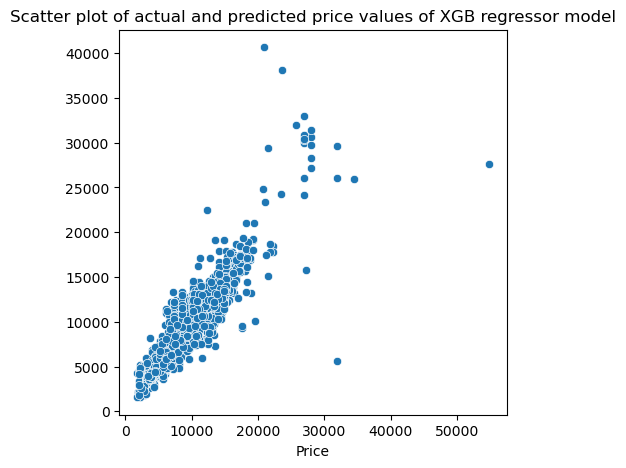

In [44]:
# Visualizing the actal and predicted price values

act_pred(y_test,xgb_pred,'XGB regressor')

In [149]:
print(xgb.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [46]:
# Model comparison

result_data=pd.DataFrame({'Model':['LR','RF','KNN','XGB'],'MAE':[lr_mae,rf_mae,knn_mae,xgb_mae],
            'MSE':[lr_mse,rf_mse,knn_mse,xgb_mse],'RMSE':[lr_rmse,rf_rmse,knn_rmse,xgb_rmse],
                'R2 score':[lr_r2,rf_r2,knn_r2,xgb_r2],'Adjusted r2':[lr_adj_r2,rf_adj_r2,knn_adj_r2,xgb_adj_r2],
             'Training score':[lr_train_score,rf_train_score,knn_train_score,xgb_train_score],
            'Testing score':[lr_test_score,rf_test_score,knn_test_score,xgb_test_score]})
result_data

,Model,MAE,MSE,RMSE,R2 score,Adjusted r2,Training score,Testing score
0,LR,2116.297004,9.443173e+06,3072.974657,0.547096,0.541840,0.544133,0.547096
1,RF,1178.175072,3.945096e+06,1986.226546,0.810789,0.808593,0.950925,0.810789
2,KNN,1592.323602,6.081100e+06,2465.988732,0.708344,0.704960,0.755742,0.708344
3,XGB,1183.014656,3.658381e+06,1912.689536,0.824540,0.822504,0.935312,0.824540


In [347]:
# There is over fitting issue in the RF model
# Eventhough there is no overfitting or underfitting issue in KNN model ,the accuracy is less.
# R2, Adjusted R2 scores and error values in XGB boosting model are better and there is no overfitting or underfitting issue
# So, we are proceeding with the hyper parameter tuning of the RF and XGBoost  models to decide

In [279]:
# Hyper parameter of XGB regressor model

In [191]:
# Let us see the parameters of XGB regressor model

print(xgb.get_params())


{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [47]:
# Hyperparameter tuning of XGB regressor

# GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [192]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01,0.015,0.02,0.025,0.03],
        'max_depth': [9,10],
        'min_child_weight': [1],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'n_estimators' : [400],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',
                           cv = cv,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)
    return gsearch.best_params_

In [154]:
hyperParameterTuning(X_train,y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


{'colsample_bytree': 0.8,
 'learning_rate': 0.015,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 400,
 'objective': 'reg:squarederror',
 'subsample': 0.8}

In [48]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.8,
        learning_rate = 0.01215,
        max_depth = 11,
        min_child_weight = 1,
        n_estimators = 400,
        subsample = 0.8)


In [49]:
%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)


CPU times: total: 8.47 s
Wall time: 2.96 s


In [50]:
# Evaluation of the model

# Calling evaluation function

xgb_mae,xgb_mse,xgb_rmse,xgb_r2,xgb_adj_r2=eva_metrics(y_test,y_pred_xgb)
print('Mean_absolute_error:',xgb_mae)
print('Mean_squared_error:',xgb_mse)
print('Root_mean_squared_error:',xgb_rmse)
print('R2 score:',xgb_r2)
print('Adjusted r2 value:',xgb_adj_r2)


Mean_absolute_error: 1142.4290852553527
Mean_squared_error: 3355209.248525134
Root_mean_squared_error: 1831.7230272410548
R2 score: 0.8390808261860658
Adjusted r2 value: 0.8372132922539892


In [51]:
# Checking training & testing score

xgb_train_score,xgb_test_score=train_test_score(X_train,X_test,y_train,y_test,xgb_model)
print('Training score:',xgb_train_score)
print('Testing score:',xgb_test_score)

Training score: 0.9316388953663222
Testing score: 0.8390808261860658


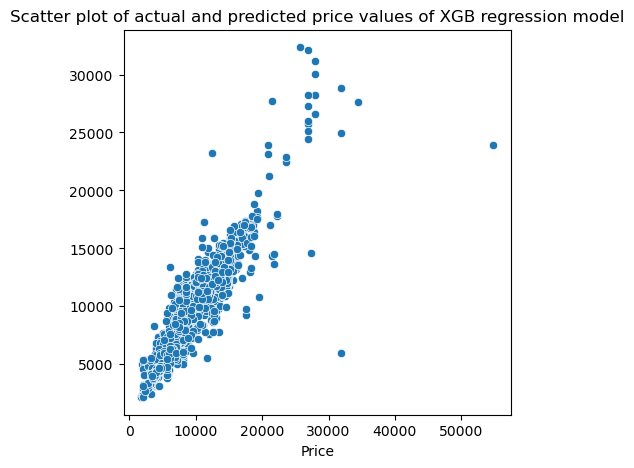

In [52]:
# Visualizing the actal and predicted price values

act_pred(y_test,y_pred_xgb,'XGB regression')

In [53]:
# After various attempts of tuning the parameters, the finalized parameter which gives better result than all

print(xgb_model.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01215, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 11, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 400, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [54]:
# Saving the model 

import joblib

file='Flight_tic_price_pred_83p90.pkl'
joblib.dump(xgb_model,file)

['Flight_tic_price_pred_83p90.pkl']

In [261]:
top_features

array(['Total_Stops', 'Airline_Jet Airways', 'Day', 'Month', 'Arrival_hr',
       'Dep_Time_hr', 'Weekday', 'Airline_Multiple carriers',
       'Dep_Time_min', 'Arrival_min', 'Airline_Air India',
       'Destination_Delhi', 'Airline_IndiGo', 'Destination_Hyderabad',
       'Source_Mumbai'], dtype=object)

In [55]:
model=joblib.load('Flight_tic_price_pred_83p90.pkl')

In [64]:
model.predict([X_test.loc[0].values])[0]

5862.4307

In [77]:
pd.set_option('display.max_columns',None)
data_model.head(1)

,Total_Stops,Price,Day,Month,Weekday,Dep_Time_hr,Dep_Time_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,6,22,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
